In [599]:
#!pip install xgboost

In [600]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, SGDClassifier, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score,
                             roc_auc_score, matthews_corrcoef, confusion_matrix, make_scorer)
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import class_weight
from sklearn.svm import SVC, LinearSVC
from sklearn.utils.class_weight import compute_sample_weight

In [601]:
import xgboost as xgb

In [602]:
from matplotlib.colors import LinearSegmentedColormap,ListedColormap
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [603]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
import re
import random
from scipy import stats
from scipy.stats import t
from itertools import chain

In [609]:
import tensorflow as tf
from tensorflow.python.framework.random_seed import set_seed
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from pathlib import Path

#from keras.models import Sequential
#from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier

In [610]:
#from scikeras.wrappers import KerasClassifier, KerasRegressor

In [611]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.functional import binary_cross_entropy

In [612]:
#!pip install imbalanced-learn

In [613]:
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler

In [614]:
#!pip install psyke==0.8.9

In [615]:
from psyke import Extractor, Clustering, EvaluableModel
from psyke.extraction.hypercubic.strategy import AdaptiveStrategy
from psyke.extraction.hypercubic import Grid, FeatureRanker
from psyke.tuning.orchid import OrCHiD
from psyke.tuning.crash import CRASH
from psyke.utils.logic import pretty_theory
from psyke.utils import Target
from psyke.schema import LessThan, GreaterThan, Between

In [616]:
#!pip install psyki

In [617]:
from psyki.logic import Theory
from psyki.logic.prolog import TuProlog
from psyki.ski import Injector

In [618]:
#!pip install scikeras

In [619]:
# function to parse rules from theories
def parse_rules(rule_string):
    opposite_signs = {
        '<': '>',
        '>': '<',
        '<=': '>=',
        '>=': '<=',
        '=<': '=>',
        '=>': '=<',
    }
    rules = []
    # predicate with rules
    rule_pattern = re.compile(r"'Outcome'\((.*?)\)\s:-\s*(.*?)\.($|\s)")
    # final predicate with no rules
    rule_pattern_end = re.compile(r"'Outcome'\((.*?)\)\.")
    # rule condition
    condition_pattern = re.compile(r'([a-zA-Z]+)\s*([=<>]+)\s*([0-9.-]+)')
    # rule interval
    interval_pattern = re.compile(r"([a-zA-Z]+)\s+in\s+\[([-+]?\d*\.?\d+),\s*([-+]?\d*\.?\d+)\]")
    for match in rule_pattern.finditer(rule_string):
        outcome = match.group(1).strip().split()[-1]
        conditions_str = match.group(2).strip()
        conditions = []
        # condition with less than / greater than
        for condition_match in condition_pattern.finditer(conditions_str):
            variable = condition_match.group(1)
            operation = condition_match.group(2)
            threshold = float(condition_match.group(3))
            conditions.append({
                "variable": variable,
                "operation": operation,
                "threshold": threshold
            })
        # condition with interval
        for condition_match in interval_pattern.finditer(conditions_str):
            variable = condition_match.group(1)
            lower_bound = float(condition_match.group(2))
            upper_bound = float(condition_match.group(3))
            conditions.extend([
                {"variable": variable,
                "operation": ">=",
                "threshold": lower_bound},
                {"variable": variable,
                "operation": "<=",
                "threshold": upper_bound}           
            ]) 
        rules.append({
            "conditions": conditions,
            "outcome": outcome
        })
    # rule with no conditions
    for match in rule_pattern_end.finditer(rule_string):
        outcome = match.group(1).strip().split()[-1]
        rules.append({
            "conditions": [],
            "outcome": outcome
        })
    return rules

In [620]:
# define rules from the knowledge base
def get_kb_rules():
    return [ {"conditions" : [{"variable" : "BMI",
                                      "operation" : "<=",
                                      "threshold" : 25},
                                     {"variable" : "Glucose",
                                      "operation" : "<=",
                                      "threshold" : 100}],
                     "outcome" : "healthy"},
                    {"conditions" : [{"variable" : "BMI",
                                      "operation" : ">=",
                                      "threshold" : 30},
                                     {"variable" : "Glucose",
                                      "operation" : ">=",
                                      "threshold" : 126}],
                     "outcome" : "diabetes"}]

In [621]:
def get_outcome(sample, rules): 
    outcome = np.nan
    for rule in rules:
        conditions_met = all(apply_condition(cond["operation"], sample[cond["variable"]],cond["threshold"]) for cond in rule['conditions'])
        if conditions_met:
            outcome = rule["outcome"]
            break
    return outcome

In [622]:
def get_rule(rules, sample): 
    outcome = np.nan
    for id, rule in enumerate(rules):
        conditions_met = all(apply_condition(cond["operation"], sample[cond["variable"]],cond["threshold"]) for cond in rule['conditions'])
        if conditions_met:
            outcome = rule["outcome"]
            break
    return id, outcome

In [623]:
def apply_condition(operation, value, threshold):
    if operation == "<=":
        return value <= threshold
    if operation == "=<":
        return value <= threshold
    elif operation == "<":
        return value < threshold
    if operation == ">=":
        return value >= threshold
    if operation == "=>":
        return value >= threshold
    elif operation == ">":
        return value > threshold

In [624]:
# functions to print scores for the generated rules
def print_scores(scores):
    print(f'Classification accuracy = {scores[EvaluableModel.ClassificationScore.ACCURACY][0]:.2f} (data), '
          f'{scores[EvaluableModel.ClassificationScore.ACCURACY][1]:.2f} (BB)\n'
          f'F1 = {scores[EvaluableModel.ClassificationScore.F1][0]:.2f} (data), '
          f'{scores[EvaluableModel.ClassificationScore.F1][1]:.2f} (BB)')

def get_scores(extractor, test, predictor):
    return extractor.score(test, predictor, True, True, False, task=EvaluableModel.Task.CLASSIFICATION,
                           scoring_function=[EvaluableModel.ClassificationScore.ACCURACY,
                                             EvaluableModel.ClassificationScore.F1])

In [625]:
# function to compute performance metrics
def get_results(y_pred, y_test):
    a   = accuracy_score(y_test, y_pred)
    ba  = balanced_accuracy_score(y_test, y_pred)
    p   = precision_score(y_test, y_pred)
    r   = recall_score(y_test, y_pred)
    sp  = recall_score(y_test, y_pred, pos_label=0)
    f1  = f1_score(y_test, y_pred, average="macro")
    roc = roc_auc_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    return [a, ba, p, r, sp, f1, roc, mcc]

In [626]:
# function to compute accuracy with respect to a rule-based system
def get_relative_accuracy(y_test, y_rule, y_pred):
    return sum((y_test == y_rule) & (y_rule == y_pred.round())) / sum(y_test == y_rule)
 
def get_relative_sensitivity(y_test, y_rule, y_pred):
    return sum((y_test == y_rule) & (y_test == 1) & (y_rule == y_pred.round())) / sum((y_test == y_rule) & (y_test == 1))
 
def get_relative_specificity(y_test, y_rule, y_pred):
    return sum((y_test == y_rule) & (y_test == 0) & (y_rule == y_pred.round())) / sum((y_test == y_rule) & (y_test == 0))

In [627]:
# function to generate a summary table
def get_results_table(scores_ml, scores_kbml, n_1, n_train, n_test):
    res = pd.DataFrame(index = scores_ml.columns, columns = ["ML_mean","ML_std","KB-ML_mean","KB-ML_std"])
    res["ML_mean"] = scores_ml.mean().round(3)
    res["ML_std"] = scores_ml.std().round(3)
    res["KB-ML_mean"] = scores_kbml.mean().round(3)
    res["KB-ML_std"] = scores_kbml.std().round(3)
    res["p-value"] = np.nan
    res["corr_p-value"] = np.nan
    for c in res.index:
        difference = scores_ml[c].values - scores_kbml[c].values
        # uncorrected paired t-test p-value
        t_stat_uncorrected = np.mean(difference) / np.sqrt(np.var(difference, ddof=1) / (n_1+1))
        p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), n_1)
        res.loc[c,"p-value"] = p_val_uncorrected.round(4)
        # corrected paired t-test p-value
        t_stat, p_val = compute_corrected_ttest(difference, n_1, n_train, n_test)
        res.loc[c,"corr_p-value"] = p_val.round(4)
    return res

In [628]:
# function to correct the standard deviation using Nadeau and Bengio's approach.
def corrected_std(differences, n_train, n_test):
    # kr = k times r, r times repeated k-fold crossvalidation,
    # kr equals the number of times the model was evaluated
    kr = len(differences)
    corrected_var = np.var(differences, ddof=1) * (1 / kr + n_test / n_train)
    corrected_std = np.sqrt(corrected_var)
    return corrected_std

# function to compute right-tailed paired t-test with corrected variance.
def compute_corrected_ttest(differences, df, n_train, n_test):
    mean = np.mean(differences)
    std = corrected_std(differences, n_train, n_test)
    t_stat = mean / std
    p_val = t.sf(np.abs(t_stat), df)  # right-tailed t-test
    return t_stat, p_val

In [629]:
def confusion_matrix_components(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    total = tn + fp + fn + tp
    tn_rate = tn / total
    fp_rate = fp / total
    fn_rate = fn / total
    tp_rate = tp / total
    return {'tn_rate': tn_rate, 'fp_rate': fp_rate, 'fn_rate': fn_rate, 'tp_rate': tp_rate}

In [630]:
def transform_in_condition(input_text):
    # Define the regex pattern to match "feature in [lower, upper]"
    pattern = re.compile(r'(\w+) in \[(\d+\.?\d*), (\d+\.?\d*)\]')
    
    # Define the replacement function
    def replacement(match):
        feature = match.group(1)
        lower = match.group(2)
        upper = match.group(3)
        return f'{feature} > {lower}, {feature} =< {upper}'
    
    # Replace all occurrences in the input_text
    transformed_text = pattern.sub(replacement, input_text)
    
    return transformed_text

In [631]:
class PredictorWrapper(nn.Module, BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold=0.5):
        super(PredictorWrapper, self).__init__()
        self.model = model
        self.threshold = threshold
        
    def predict(self, X):
        # Use the existing model to make predictions
        predictions = self.model.predict(X)
        
        # Convert probabilities to class labels based on the threshold
        if predictions.ndim > 1 and predictions.shape[1] > 1:
            # Model returns probabilities or one-hot encoded outputs
            # Assuming probabilities are returned
            predictions = (predictions >= self.threshold).astype(int)
            predictions = np.argmax(predictions, axis=1)
        else:
            # Model returns single probability for binary classification
            predictions = (predictions >= self.threshold).astype(int)
        
        # Ensure predictions are flat (1D array)
        predictions = predictions.flatten()
        
        # Map the numeric predictions to the desired string labels
        label_map = {0: 'healthy', 1: 'diabetes'}
        string_predictions = np.array([label_map[pred] for pred in predictions])
        
        return string_predictions

In [ ]:
def sampling(experiment, X_train, y_train):
    if experiment == "oversampling":
        return RandomOverSampler(random_state=42).fit_resample(X_train, y_train)
    elif experiment == "undersampling":
        return RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)
    else:
        return X_train, y_train

In [632]:
def confusion_matrix_components(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    total = tn + fp + fn + tp
    tn_rate = tn / total
    fp_rate = fp / total
    fn_rate = fn / total
    tp_rate = tp / total
    return {'tn_rate': tn_rate, 'fp_rate': fp_rate, 'fn_rate': fn_rate, 'tp_rate': tp_rate}

In [633]:
def compute_scores(results, model_name, y_test, y_pred, y_rule):
    results[model_name]['accuracy'].append(accuracy_score(y_test, y_pred))
    results[model_name]['precision'].append(precision_score(y_test, y_pred))
    results[model_name]['recall'].append(recall_score(y_test, y_pred))
    results[model_name]['f1'].append(f1_score(y_test, y_pred))
    results[model_name]['balanced_accuracy'].append(balanced_accuracy_score(y_test, y_pred))
    results[model_name]['mcc'].append(matthews_corrcoef(y_test, y_pred))
    cm = confusion_matrix_components(y_test, y_pred)
    results[model_name]['tn_rate'].append(cm['tn_rate'])
    results[model_name]['fp_rate'].append(cm['fp_rate'])
    results[model_name]['fn_rate'].append(cm['fn_rate'])
    results[model_name]['tp_rate'].append(cm['tp_rate'])
    results[model_name]['relative_accuracy'].append(get_relative_accuracy(y_test, y_rule, y_pred))
    results[model_name]['relative_recall'].append(get_relative_sensitivity(y_test, y_rule, y_pred))
    return results

In [634]:
def create_uneducated_predictor(
    input_shape: tuple,
    outputs: int,
    neurons_per_hidden_layer: list[int],
    activation: str = "relu",
    last_activation: str = "softmax",
    ) -> Model:
    predictor_input = Input(input_shape)
    x = predictor_input
    for neurons in neurons_per_hidden_layer:
        x = Dense(neurons, activation=activation)(x)
    x = Dense(outputs, activation=last_activation)(x)
    return Model(predictor_input, x)

In [635]:
def create_nn_predictor(neurons_per_hidden_layer=[12, 8], activation="relu", last_activation="sigmoid"):
    model = Sequential()
    model.add(Dense(neurons_per_hidden_layer[0], input_dim=X_train.shape[1], activation=activation))
    for neurons in neurons_per_hidden_layer[1:]:
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation=last_activation))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

## TRADITIONAL MACHINE LEARNING

In [773]:
random.seed(42)
torch.manual_seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [774]:
# import dataset
dataset = pd.read_csv("pima_indians_imputed.csv", index_col = 0)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# read rules
dataset_rules = dataset.copy()
dataset_rules["Rules"] = np.nan
dataset_rules.loc[(dataset_rules["BMI"] >= 30) & (dataset_rules["Glucose"] >= 126), "Rules"] = 1
dataset_rules.loc[(dataset_rules["BMI"] <= 25) & (dataset_rules["Glucose"] <= 100), "Rules"] = 0

In [775]:
# define the hyperparameter grid for each model
param_grids = {
    'DecisionTree': {
        'max_depth': [None, 10, 15, 20],
        'min_samples_split': [5, 10, 15, 20],
        'min_samples_leaf': [5, 10]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    'XGBoost' : {
        'n_estimators': [100, 200, 300],
        'eta': [0.01, 0.1, 0.3],
        'max_depth': [None, 10, 15, 20],
        #'subsample': [0.6, 0.8, 1.0],
        #'colsample_bytree': [0.6, 0.8, 1.0]
    },
    'MultiLayerPerceptron': {
        'hidden_layer_sizes': [(10,), (12, 8), (16, 8), (32, 16), (32, 16, 8)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        #'learning_rate': ['constant', 'adaptive']
    },
    'NeuralNetwork': {  # parameters for the Keras model
        #'neurons_per_hidden_layer': [[10], [12, 8], [16, 8], [32, 16], [32, 16, 8]],
        'epochs': [40, 60, 80, 100]
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 15, 20],
        'min_samples_split': [5, 10, 15, 20],
        'min_samples_leaf': [5, 10]
    },
    'KNearestNeighbor': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'SupportVector' :{
        'C': [0.001, 0.01, 0.1, 1, 10],
        'loss': ['hinge', 'squared_hinge'],
        'dual': [False]
}
}

In [776]:
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'mcc': make_scorer(matthews_corrcoef)
}

In [777]:
# define the models
models = {
    #'NeuralNetwork': KerasClassifier(build_fn=create_nn_predictor, verbose=0),
    'LogisticRegression': LogisticRegression(random_state=123, max_iter=1000),
    'SupportVector': LinearSVC(random_state=123, max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(random_state=123),
    'RandomForest': RandomForestClassifier(random_state=123),
    'GradientBoosting': GradientBoostingClassifier(random_state=123),
    #'XGBoost': xgb.XGBClassifier(random_state=123)
}

In [778]:
# perform nested cross-validation
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# initialize a dictionary to store results
results = {model: {**{metric: [] for metric in scorers}, 
                   'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                   'relative_accuracy': [], 'relative_recall': []} for model in list(models.keys()) + ["NeuralNetwork"]}
all_pred = {model: [] for model in list(models.keys()) + ["NeuralNetwork"]}

In [782]:
# model_name = 'DecisionTree'
# model = DecisionTreeClassifier(random_state=123)
# search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring="accuracy", cv=inner_cv, n_jobs=-1)
# search.fit(X, y)
# search.best_params_

In [ ]:
# perform nested cross-validation for all models except NN
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    for train_idx, test_idx in outer_cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        y_rule = dataset_rules.loc[test_idx,"Rules"].values
        
        # Scale data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Compute sample weights
        sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
        clf = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring="accuracy", cv=inner_cv, 
                                                       n_jobs=-1).fit(X_train, y_train, sample_weight=sample_weights)
        
        # Predict and compute scores
        y_pred = clf.predict(X_test)
        results = compute_scores(results, model_name, y_test, y_pred, y_rule)
        all_pred[model_name].extend(list(y_pred))

In [132]:
# perform nested cross-validation for NN
model_name = "NeuralNetwork"
for train_idx, test_idx in outer_cv.split(X, y):
    print("iteration")
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    y_rule = dataset_rules.loc[test_idx,"Rules"].values

    # validation for early stopping
    val_split = 0.1
    num_val = int(len(X_train) * val_split)
    X_train, X_val = X_train[:-num_val], X_train[-num_val:]
    y_train, y_val = y_train[:-num_val], y_train[-num_val:]
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # scale
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    cw = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
    weights = {0:cw[0], 1:cw[1]}

    # Train and score uneducated
    model_name = "NeuralNetwork"
    uneducated = create_uneducated_predictor(X_train.shape[1], 1, [12, 8], "relu", "sigmoid")
    uneducated.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
    history_uneducated = uneducated.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                                        class_weight=weights, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    #_, acc = uneducated.evaluate(X_test, y_test) #print(f'test set accuracy of the uneducated predictor: {acc*100:.2f}%')
    y_pred = uneducated.predict(X_test).flatten().round().astype("int")
    results = compute_scores(results, model_name, y_test, y_pred, y_rule)
    all_pred[model_name].extend(list(y_pred))

iteration
Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 0.7819 - accuracy: 0.4228 - val_loss: 0.7062 - val_accuracy: 0.5507
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7382 - accuracy: 0.4534 - val_loss: 0.6877 - val_accuracy: 0.5797
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7089 - accuracy: 0.4871 - val_loss: 0.6735 - val_accuracy: 0.5797
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.5322 - val_loss: 0.6609 - val_accuracy: 0.6232
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.5756 - val_loss: 0.6503 - val_accuracy: 0.6667
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6350 - val_loss: 0.6405 - val_accuracy: 0.6812
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6360 - accuracy: 0.6736 - val_loss: 0.6280 - val_accuracy: 0.7246
Ep

In [134]:
# save predictions
test_indices = np.concatenate([test_idx for _, test_idx in outer_cv.split(X, y)])
res_df = pd.DataFrame(all_pred, index = test_indices).sort_index()
#res_df.to_csv("goodit_cv_predictions.csv")

# flatten the dictionary structure
data = []
for model, metrics in results.items():
    for metric, values in metrics.items():
        for i, value in enumerate(values):
            data.append((model, metric, i, value))
# save performance scores
df = pd.DataFrame(data, columns=['model', 'metric', 'fold','value'])
#df.to_csv("goodit_cv_results.csv")

In [808]:
# import dataset and results
dataset = pd.read_csv("pima_indians_imputed.csv", index_col = 0)
df = pd.read_csv("goodit_cv_results.csv", index_col = 0)
res_df = pd.read_csv("goodit_cv_predictions.csv", index_col = 0)

In [809]:
means_df = df.groupby(["model","metric"])["value"].mean().unstack(level=1).round(3).sort_values(
    by = "recall", ascending = False)
means_df[['accuracy', 'balanced_accuracy', 'f1', 'mcc', 'precision', 'recall', 
          'relative_accuracy', 'relative_recall', 'tn_rate', 'tp_rate', 'fn_rate', 'fp_rate']] 

metric,accuracy,balanced_accuracy,f1,mcc,precision,recall,relative_accuracy,relative_recall,tn_rate,tp_rate,fn_rate,fp_rate
model,,,,,,,,,,,,
NeuralNetwork,0.738,0.742,0.670,0.472,0.612,0.754,0.982,0.976,0.475,0.263,0.086,0.176
DecisionTree,0.738,0.741,0.667,0.468,0.604,0.753,0.934,0.913,0.475,0.263,0.086,0.176
RandomForest,0.772,0.768,0.697,0.522,0.652,0.753,0.950,0.932,0.509,0.263,0.086,0.142
GradientBoosting,0.756,0.754,0.681,0.499,0.637,0.746,0.958,0.941,0.496,0.260,0.089,0.155
SupportVector,0.762,0.751,0.678,0.497,0.651,0.717,0.958,0.944,0.512,0.250,0.099,0.140
LogisticRegression,0.751,0.742,0.666,0.477,0.636,0.709,0.954,0.938,0.504,0.247,0.102,0.147


In [811]:
models_order = list(means_df.index)
res_df["pred_mean"] = res_df[models_order].mean(axis = 1)
res_df["Outcome"] = dataset["Outcome"]
res_df["ClinicalProtocol"] = dataset_rules["Rules"]
res_df["EQ"] = res_df["Outcome"]==res_df["ClinicalProtocol"]
res_df = res_df.fillna(-1)
res_df = res_df[['Outcome', 'ClinicalProtocol', 'EQ', 'pred_mean'] + models_order]
res_df = res_df.sort_values(['Outcome','ClinicalProtocol','EQ','pred_mean'], ascending=[False]*4)
res_df_index = res_df.index
res_df = res_df.reset_index(drop = True)

In [812]:
for o in res_df["Outcome"].unique():
    for c in res_df["ClinicalProtocol"].unique():
        idx = res_df[(res_df["Outcome"]==o) & (res_df["ClinicalProtocol"]==c)].index
        for col in res_df.columns[-6:]:
            res_df.loc[idx,col] = list(res_df.loc[idx,col].sort_values(ascending = False))

In [828]:
diabetes_col = "navy"
healthy_col = "hotpink"#"steelblue"
# diabetes_col = "gold"#"gold"
# healthy_col = "lightseagreen"#"deepskyblue"#"light

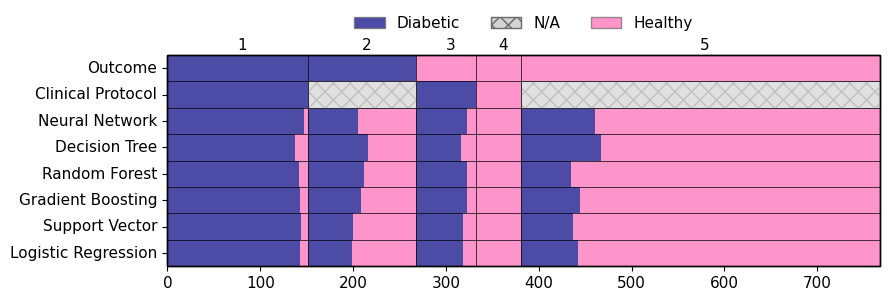

In [836]:
plt.rcParams['patch.edgecolor'] = 'none'

fig, axes = plt.subplots(figsize=(9, 3.2))

cmap = LinearSegmentedColormap.from_list('rg', [ "lightgray", healthy_col, diabetes_col], N=256) 
sns.heatmap(res_df.drop(columns = ["EQ","pred_mean"]).T, cmap=cmap, cbar=False, alpha=0.7, xticklabels = 100, 
            linewidths=0.0, ax=axes, rasterized=True)
axes.set_yticklabels(['Outcome', 'Clinical Protocol', 'Neural Network', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
                      'Support Vector', 'Logistic Regression'])
axes.tick_params(axis='both', which='major', labelsize=11)
colors = axes.collections[0].get_facecolors()
axes.collections[0].set_edgecolors(colors)

for r in range(1,len(res_df.columns)-1):
    axes.add_patch(Rectangle((0, 0),  len(res_df), r, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((0, 0), len(res_df), 8, fill=False, edgecolor="black", lw=1, clip_on=False))

n1 = len(res_df[(res_df["Outcome"]==1) & (res_df["ClinicalProtocol"]==1)])
n2 = len(res_df[(res_df["Outcome"]==1)])
n3 = len(res_df[(res_df["Outcome"]==1)]) + len(res_df[(res_df["Outcome"]==0) & (res_df["ClinicalProtocol"]==1)])
n4 = len(res_df) - len(res_df[(res_df["Outcome"]==0) & (res_df["ClinicalProtocol"]==-1)])
n5 = len(res_df)

axes.add_patch(Rectangle((0, 0), n1, 8, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((0, 0), n2, 8, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((0, 0), n3, 8, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((0, 0), n4, 8, fill=False, edgecolor="black", lw=0.5, clip_on=False))

axes.add_patch(Rectangle((n1, 1), n2-n1, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n1, 1), n2-n1, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((n4, 1), n5-n4, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n4, 1), n5-n4, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))

axes.add_patch(Rectangle((0, 0), n5, 8, fill=False, edgecolor="black", lw=1, clip_on=False))

plt.text(n1/2,     -0.2, "1", size=11)
plt.text((n1+n2)/2,-0.2, "2", size=11)
plt.text((n2+n3)/2,-0.2, "3", size=11)
plt.text((n3+n4)/2,-0.2, "4", size=11)
plt.text((n4+n5)/2,-0.2, "5", size=11)

legend_elements = [
    Patch(facecolor=diabetes_col, edgecolor="dimgray", label="Diabetic", alpha= 0.7),
    Patch(facecolor="lightgray", edgecolor="dimgray", label="N/A", hatch="xx"),
    Patch(facecolor=healthy_col, edgecolor="dimgray", label="Healthy", alpha= 0.7)
]

legend = axes.legend(handles=legend_elements, loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=3, fontsize=11)
legend.get_frame().set_linewidth(0.0)
legend.get_frame().set_facecolor('none')
legend.get_frame().set_edgecolor('none')
plt.subplots_adjust(hspace=0.2)
plt.tight_layout()
#plt.savefig("ml_models2.pdf")

## KNOWEDGE INJECTION

### NEURAL NETWORK

In [797]:
exp = "inj_nn"

In [798]:
# import dataset
dataset = pd.read_csv("pima_indians_imputed.csv", index_col = 0)
X = dataset.iloc[:, :-1].values.astype("float32")
y = dataset.iloc[:, -1].values.astype("float32")

In [799]:
EPOCHS = 100
BATCH_SIZE = 32
VERBOSE = 1

In [800]:
knowledge = TuProlog.from_file("diabetes.pl")
theory = Theory(knowledge, dataset)
for rule in theory.formulae:
    print(f"{rule.rhs} -> {rule.lhs.args.last}")

Glucose > 126.0, BMI > 30.0 -> 1.0
Glucose =< 100.0, BMI =< 25.0 -> 0.0


In [294]:
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)

model_names = ["kb_rules", "uneducated", "educated_train", "educated"]
scorers = ['accuracy', 'precision', 'recall', 'f1', 'balanced_accuracy', 'mcc', 'tn_rate', 'fp_rate', 'fn_rate', 'tp_rate']
results = {model: {**{metric: [] for metric in scorers}, 
                   'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                   'relative_accuracy': [], 'relative_recall': []} for model in model_names}
all_pred = {model: [] for model in model_names}

# perform nested cross-validation
for i, (train_idx, test_idx) in enumerate(outer_cv.split(X, y)):
    print("Iteration",i)
    train, test = dataset.iloc[train_idx,:], dataset.iloc[test_idx,:]
    X_train, y_train, X_test, y_test = X[train_idx], y[train_idx], X[test_idx], y[test_idx]
    y_rule = dataset_rules.loc[test_idx,"Rules"].values
    
    # validation for early stopping
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)
    
    # val_split = 0.1
    # num_val = int(len(X_train) * val_split)
    # X_train, X_val = X_train[:-num_val], X_train[-num_val:]
    # y_train, y_val = y_train[:-num_val], y_train[-num_val:]
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # scale
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    cw = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
    weights = {0:cw[0], 1:cw[1]}
    # inject knowledge
    theory = Theory(knowledge, train)
    uneducated = create_uneducated_predictor(train.shape[1]-1, 1, [12,8], "relu", "sigmoid")

    # train and score uneducated
    model_name = "uneducated"
    uneducated.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
    history_uneducated = uneducated.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, class_weight=weights,
                                        validation_data=(X_val, y_val), callbacks=[early_stopping])
    #_, acc = uneducated.evaluate(X_test, y_test) #print(f'test set accuracy of the uneducated predictor: {acc*100:.2f}%')
    y_pred = uneducated.predict(X_test).flatten().round().astype("int")
    results = compute_scores(results, model_name, y_test, y_pred, y_rule)
    all_pred[model_name].extend(list(y_pred))

    #train and score educated (trainable weights)
    model_name = "educated_train"
    injector = Injector.kins(uneducated)
    educated = injector.inject(theory)
    theory.set_all_formulae_trainable()
    educated.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
    history_educated = educated.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, class_weight=weights,
                                        validation_data=(X_val, y_val), callbacks=[early_stopping])
    #_, acc = educated.evaluate(X_test, y_test) #print(f'test set accuracy of the educated predictor: {acc*100:.2f}%')
    y_pred = educated.predict(X_test).flatten().round().astype("int")
    results = compute_scores(results, model_name, y_test, y_pred, y_rule)
    all_pred[model_name].extend(list(y_pred))

    # train and score educated (static weights)
    model_name = "educated"
    injector = Injector.kins(uneducated)
    educated = injector.inject(theory)
    theory.set_all_formulae_static()
    educated.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
    history_educated = educated.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, class_weight=weights,
                                        validation_data=(X_val, y_val), callbacks=[early_stopping])
    #_, acc = educated.evaluate(X_test, y_test) #print(f'test set accuracy of the educated predictor: {acc*100:.2f}%')
    y_pred = educated.predict(X_test).flatten().round().astype("int")
    results = compute_scores(results, model_name, y_test, y_pred, y_rule)
    all_pred[model_name].extend(list(y_pred))

    model_name = "kb_rules"
    y_pred = np.array(dataset_rules.iloc[test_idx]["Rules"].fillna(0))
    results = compute_scores(results, model_name, y_test, y_pred, y_rule)
    all_pred[model_name].extend(list(y_pred))

Iteration 0
Epoch 1/100
20/20 [==============================] - 1s 34ms/step - loss: 0.7830 - accuracy: 0.4316 - val_loss: 0.7527 - val_accuracy: 0.4857
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7028 - accuracy: 0.4960 - val_loss: 0.6719 - val_accuracy: 0.5571
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6564 - accuracy: 0.5733 - val_loss: 0.6253 - val_accuracy: 0.6143
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6307 - accuracy: 0.6425 - val_loss: 0.5923 - val_accuracy: 0.7000
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6114 - accuracy: 0.6667 - val_loss: 0.5717 - val_accuracy: 0.7143
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5981 - accuracy: 0.6795 - val_loss: 0.5548 - val_accuracy: 0.7143
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5870 - accuracy: 0.7101 - val_loss: 0.5403 - val_accuracy: 0.7286


In [295]:
# save predictions
test_indices = np.concatenate([test_idx for _, test_idx in outer_cv.split(X, y)])
res_df = pd.DataFrame(all_pred, index = test_indices).sort_index()
#res_df.to_csv(f"goodit_{exp}_predictions.csv")

# flatten the dictionary structure
data = []
for model, metrics in results.items():
    for metric, values in metrics.items():
        for i, value in enumerate(values):
            data.append((model, metric, i, value))
# save performance scores
df = pd.DataFrame(data, columns=['model', 'metric', 'fold','value'])
#df.to_csv(f"goodit_{exp}_results.csv")

In [296]:
# import dataset and results
#dataset = pd.read_csv("pima_indians_imputed.csv", index_col = 0)
#df = pd.read_csv(f"goodit_{exp}_results.csv", index_col = 0)
#res_df = pd.read_csv(f"goodit_{exp}_predictions.csv", index_col = 0)

In [261]:
means_df = df.groupby(["model","metric"])["value"].mean().unstack(level=1).round(3).sort_values(
                                                                by = "recall", ascending = False)
means_df[['accuracy', 'balanced_accuracy', 'f1', 'mcc', 'precision', 'recall', 
          'relative_accuracy', 'relative_recall', 'tn_rate', 'tp_rate', 'fn_rate', 'fp_rate']] 

metric,accuracy,balanced_accuracy,f1,mcc,precision,recall,relative_accuracy,relative_recall,tn_rate,tp_rate,fn_rate,fp_rate
model,,,,,,,,,,,,
educated,0.759,0.765,0.694,0.513,0.628,0.783,0.961,0.955,0.486,0.273,0.076,0.165
uneducated,0.752,0.751,0.679,0.493,0.634,0.746,0.954,0.937,0.492,0.260,0.089,0.159
educated_train,0.733,0.732,0.654,0.450,0.599,0.728,0.945,0.927,0.479,0.254,0.095,0.172
kb_rules,0.764,0.719,0.626,0.466,0.707,0.567,1.000,1.000,0.566,0.198,0.151,0.085


### DECISION TREE

In [757]:
exp = "inj_dt"

In [767]:
# split data according to domain rules
def split_data_rules(data):
  subset1 = data[(data["Glucose"]<=100) & (data["BMI"]<=25)]
  subset2 = data[((data["Glucose"]<=100) & (data["BMI"]> 25)) | ((data["Glucose"]> 100) & (data["Glucose"]<126)) | (data["Glucose"]>=126) & (data["BMI"]< 30)]
  subset3 = data[(data["Glucose"]>=126) & (data["BMI"]>=30)]
  return subset1, subset2, subset3

In [768]:
# dt_params = {'max_depth': range(2,20,1),
#             'min_samples_split': range(1,20,1),
#             'min_samples_leaf': range(2,10,1),
#             'class_weight': ["balanced"]}

# set splits (10x10 repeated stratified CV)
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

model_names = ["kb", "dt", "dt_kb"]
scorers = ['accuracy', 'precision', 'recall', 'f1', 'balanced_accuracy', 'mcc', 'tn_rate', 'fp_rate', 'fn_rate', 'tp_rate']
results = {model: {**{metric: [] for metric in scorers}, 
                   'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                  'relative_accuracy': [], 'relative_recall': []} for model in model_names}
all_pred = {model: [] for model in model_names}

for i, (train_idx, test_idx) in enumerate(outer_cv.split(X, y)):
    train, test = dataset.iloc[train_idx,:], dataset.iloc[test_idx,:]
    X_train, y_train, X_test, y_test = X[train_idx], y[train_idx], X[test_idx], y[test_idx]
    y_rule = dataset_rules.loc[test_idx,"Rules"].values

    depth = 10
    # train ML model
    model_name = "dt"
    clf = DecisionTreeClassifier(random_state=123, max_depth = depth, min_samples_leaf = 10, min_samples_split = 5,
                                 class_weight ="balanced").fit(X_train, y_train)
    #clf = GridSearchCV(estimator=DecisionTreeClassifier(random_state=123), param_grid=dt_params, scoring="accuracy", 
    #                   cv=inner_cv, n_jobs=-1).fit(X_train, y_train, sample_weight=sample_weights)  
    y_pred = clf.predict(X_test)
    results = compute_scores(results, model_name, y_test, y_pred, y_rule)
    all_pred[model_name].extend(list(y_pred)) 
    
    # train KB-ML model
    model_name = "dt_kb"
    subset1, subset2, subset3 = split_data_rules(train)

    # first 4 splits are the conditions of the rules
    clf2 = DecisionTreeClassifier(random_state=123, max_depth = depth-4, min_samples_split = 5, class_weight ="balanced").fit(subset2.values[:,:8], subset2.values[:,8])
    clf3 = DecisionTreeClassifier(random_state=123, max_depth = depth-4, min_samples_split = 5, class_weight ="balanced").fit(subset3.values[:,:8], subset3.values[:,8])
    # predict
    subtest1, subtest2, subtest3 = split_data_rules(test)
    test["Pred"] = 0
    test.loc[subtest2.index, "Pred"] = clf2.predict(subtest2.values[:,:8])
    test.loc[subtest3.index, "Pred"] = clf3.predict(subtest3.values[:,:8])
    # save results
    y_pred = test["Pred"].values
    results = compute_scores(results, model_name, y_test, y_pred, y_rule)
    all_pred[model_name].extend(list(y_pred))  

    # rules
    model_name = "kb"
    y_pred = np.array(dataset_rules.iloc[test_idx]["Rules"].fillna(0))
    results = compute_scores(results, model_name, y_test, y_pred, y_rule)
    all_pred[model_name].extend(list(y_pred))

In [769]:
# save predictions
test_indices = np.concatenate([test_idx for _, test_idx in outer_cv.split(X, y)])
res_df = pd.DataFrame(all_pred, index = test_indices).sort_index()
#res_df.to_csv(f"goodit_{exp}_predictions.csv")

# flatten the dictionary structure
data = []
for model, metrics in results.items():
    for metric, values in metrics.items():
        for i, value in enumerate(values):
            data.append((model, metric, i, value))
# save performance scores
df = pd.DataFrame(data, columns=['model', 'metric', 'fold','value'])
#df.to_csv(f"goodit_{exp}_results.csv")

In [770]:
# import dataset and results
#dataset = pd.read_csv("pima_indians_imputed.csv", index_col = 0)
#df = pd.read_csv(f"goodit_{exp}_results.csv", index_col = 0)
#res_df = pd.read_csv(f"goodit_{exp}_predictions.csv", index_col = 0)

In [771]:
means_df = df.groupby(["model","metric"])["value"].mean().unstack(level=1).round(3).sort_values(
                                                                by = "recall", ascending = False)
means_df[['accuracy', 'balanced_accuracy', 'f1', 'mcc', 'precision', 'recall', 
          'relative_accuracy', 'relative_recall', 'tn_rate', 'tp_rate', 'fn_rate', 'fp_rate']] 

metric,accuracy,balanced_accuracy,f1,mcc,precision,recall,relative_accuracy,relative_recall,tn_rate,tp_rate,fn_rate,fp_rate
model,,,,,,,,,,,,
dt_kb,0.676,0.686,0.607,0.360,0.527,0.723,0.786,0.714,0.423,0.252,0.096,0.228
dt,0.721,0.719,0.638,0.424,0.582,0.711,0.925,0.901,0.473,0.249,0.100,0.179
kb,0.764,0.719,0.626,0.466,0.707,0.567,1.000,1.000,0.566,0.198,0.151,0.085


## KNOWLEDGE EXTRACTION

### NEURAL NETWORKS

In [801]:
exp = "ext_nn"

In [802]:
EPOCHS = 100
BATCH_SIZE = 32
VERBOSE = 1

In [803]:
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)

model_names = ["ml", "kb_rules", "ml_rules", "kbml_rules"]
scorers = ['accuracy', 'precision', 'recall', 'f1', 'balanced_accuracy', 'mcc', 'tn_rate', 'fp_rate', 'fn_rate', 'tp_rate']
results = {model: {**{metric: [] for metric in scorers}, 
                   'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                   'relative_accuracy': [], 'relative_recall': []} for model in model_names}
all_pred = {model: [] for model in model_names}

In [ ]:
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# perform nested cross-validation
ml_theories = []
all_ml_scores = []

for i, (train_idx, test_idx) in enumerate(outer_cv.split(X, y)):
    print("Iteration",i)
    train, test = dataset.iloc[train_idx,:], dataset.iloc[test_idx,:]
    X_train, y_train, X_test, y_test = X[train_idx], y[train_idx], X[test_idx], y[test_idx]
    y_rule = dataset_rules.loc[test_idx,"Rules"].values
    
    # validation for early stopping
    train, val, X_train, X_val, y_train, y_val = train_test_split(train, X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)
    
    # val_split = 0.1
    # num_val = int(len(X_train) * val_split)
    # X_train, X_val = X_train[:-num_val], X_train[-num_val:]
    # y_train, y_val = y_train[:-num_val], y_train[-num_val:]
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # scale
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    normalization = {key: (m, s) for key, m, s in zip(dataset.columns, scaler.mean_, scaler.scale_)}
    
    cw = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
    weights = {0:cw[0], 1:cw[1]}
    # inject knowledge
    theory = Theory(knowledge, train)
    predictor = create_uneducated_predictor(train.shape[1]-1, 1, [12,8], "relu", "sigmoid")

    # train and score uneducated
    model_name = "ml"
    predictor.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
    history_predictor = predictor.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, class_weight=weights,
                                        validation_data=(X_val, y_val), callbacks=[early_stopping])
    #_, acc = predictor.evaluate(X_test, y_test) #print(f'test set accuracy of the uneducated predictor: {acc*100:.2f}%')
    y_pred = predictor.predict(X_test).flatten().round().astype("int")
    results = compute_scores(results, model_name, y_test, y_pred, y_rule)
    all_pred[model_name].extend(list(y_pred))
    
    # prepare data (for explaining)
    train.loc[:,dataset.columns[:-1]] = X_train
    #
    val.loc[:,dataset.columns[:-1]]= X_val
    val["Outcome"].replace({0: 'healthy', 1: 'diabetes'}, inplace = True)
    #
    test.loc[:,dataset.columns[:-1]] = X_test
    test["Outcome"].replace({0: 'healthy', 1: 'diabetes'}, inplace = True)
    
    predictor = PredictorWrapper(predictor)
    # default
    dd = 0
    best_abb = -1
    
    # find 
    for depth in range(5,21):
        explainer = Extractor.cart(predictor, max_depth=depth, max_leaves=depth, simplify=False, normalization=normalization)
        theory = explainer.extract(train)    
        scores, completeness = get_scores(explainer, val, predictor)
        abb = list(scores.values())[0][1]
        print_scores(scores)
        if abb > best_abb:
            dd = depth
            best_abb = abb

    depth = dd
    print("\nDepth",depth)
    explainer = Extractor.cart(predictor, max_depth=depth, max_leaves=depth, simplify=False, normalization=normalization)
    theory = explainer.extract(train)  
    ml_rules_str = pretty_theory(theory)
    ml_theories.append(pretty_theory(theory)) 
    scores, completeness = get_scores(explainer, test, predictor)
    ml_scores = [value for sublist in scores.values() for value in sublist]
    all_ml_scores.append(ml_scores)
    print(f'\nPerformance ({explainer.n_rules} rules with {completeness * 100:.2f}% coverage):')
    print_scores(scores)
    print('\nExtracted rules:\n\n' + pretty_theory(theory) + "\n\n")

    #parse rules
    ml_rules = parse_rules(pretty_theory(theory))
    model_name = "ml_rules"
    y_pred = np.array(dataset.iloc[test_idx].apply(lambda row: get_outcome(row, ml_rules), axis=1).replace({'diabetes': 1, 'healthy': 0}))
    results = compute_scores(results, model_name, y_test, y_pred, y_rule)
    all_pred[model_name].extend(list(y_pred))
    #
    model_name = "kbml_rules"
    y_pred = np.array(dataset.iloc[test_idx].apply(lambda row: get_outcome(row, get_kb_rules() + ml_rules), axis=1).replace({'diabetes': 1, 'healthy': 0}))
    results = compute_scores(results, model_name, y_test, y_pred, y_rule)
    all_pred[model_name].extend(list(y_pred))
    #
    model_name = "kb_rules"
    y_pred = np.array(dataset_rules.iloc[test_idx]["Rules"].fillna(0))
    results = compute_scores(results, model_name, y_test, y_pred, y_rule)
    all_pred[model_name].extend(list(y_pred))

In [ ]:
# save predictions
test_indices = np.concatenate([test_idx for _, test_idx in outer_cv.split(X, y)])
res_df = pd.DataFrame(all_pred, index = test_indices).sort_index()
#res_df.to_csv(f"goodit_{exp}_predictions.csv")

# flatten the dictionary structure
data = []
for model, metrics in results.items():
    for metric, values in metrics.items():
        for i, value in enumerate(values):
            data.append((model, metric, i, value))
# save performance scores
df = pd.DataFrame(data, columns=['model', 'metric', 'fold','value'])
#df.to_csv(f"goodit_{exp}_results.csv")

In [129]:
# # import dataset and results
# dataset = pd.read_csv("pima_indians_imputed.csv", index_col = 0)
# df = pd.read_csv(f"goodit_{exp}_results.csv", index_col = 0)
# res_df = pd.read_csv(f"goodit_{exp}_predictions.csv", index_col = 0)

In [130]:
means_df = df.groupby(["model","metric"])["value"].mean().unstack(level=1).round(3).sort_values(
                                                                by = "recall", ascending = False)
means_df[['accuracy', 'balanced_accuracy', 'f1', 'mcc', 'precision', 'recall', 
          'relative_accuracy', 'relative_recall', 'tn_rate', 'tp_rate', 'fn_rate', 'fp_rate']] 

metric,accuracy,balanced_accuracy,f1,mcc,precision,recall,relative_accuracy,relative_recall,tn_rate,tp_rate,fn_rate,fp_rate
model,,,,,,,,,,,,
ml,0.741,0.749,0.678,0.483,0.609,0.776,0.965,0.959,0.470,0.271,0.078,0.181
kbml_rules,0.725,0.731,0.654,0.449,0.589,0.750,1.000,1.000,0.463,0.262,0.087,0.188
ml_rules,0.722,0.723,0.643,0.435,0.588,0.724,0.964,0.950,0.470,0.253,0.096,0.181
kb_rules,0.764,0.719,0.626,0.466,0.707,0.567,1.000,1.000,0.566,0.198,0.151,0.085


### DECISION TREE

In [804]:
exp = "ext_dt"

In [805]:
# set splits (10x10 repeated stratified CV)
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

model_names = ["kb", "dt", "dt_kb"]
scorers = ['accuracy', 'precision', 'recall', 'f1', 'balanced_accuracy', 'mcc', 'tn_rate', 'fp_rate', 'fn_rate', 'tp_rate']
results = {model: {**{metric: [] for metric in scorers}, 
                   'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                  'relative_accuracy': [], 'relative_recall': []} for model in model_names}
all_pred = {model: [] for model in model_names}

for i, (train_idx, test_idx) in enumerate(outer_cv.split(X, y)):
    train, test = dataset.iloc[train_idx,:], dataset.iloc[test_idx,:]
    X_train, y_train, X_test, y_test = X[train_idx], y[train_idx], X[test_idx], y[test_idx]
    y_rule = dataset_rules.loc[test_idx,"Rules"].values

    depth = 10
    # train ML model
    model_name = "dt"
    clf = DecisionTreeClassifier(random_state=123, max_depth = depth, min_samples_leaf = 10, min_samples_split = 5,
                                 class_weight ="balanced").fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results = compute_scores(results, model_name, y_test, y_pred, y_rule)
    all_pred[model_name].extend(list(y_pred)) 
    
    model_name = "dt_kb"
    y_pred = np.where(~np.isnan(y_rule), y_rule, y_pred)
    results = compute_scores(results, model_name, y_test, y_pred, y_rule)
    all_pred[model_name].extend(list(y_pred))
    
    model_name = "kb"
    y_pred = np.array(dataset_rules.iloc[test_idx]["Rules"].fillna(0))
    results = compute_scores(results, model_name, y_test, y_pred, y_rule)
    all_pred[model_name].extend(list(y_pred))

In [806]:
# save predictions
test_indices = np.concatenate([test_idx for _, test_idx in outer_cv.split(X, y)])
res_df = pd.DataFrame(all_pred, index = test_indices).sort_index()
#res_df.to_csv(f"goodit_{exp}_predictions.csv")

# flatten the dictionary structure
data = []
for model, metrics in results.items():
    for metric, values in metrics.items():
        for i, value in enumerate(values):
            data.append((model, metric, i, value))
# save performance scores
df = pd.DataFrame(data, columns=['model', 'metric', 'fold','value'])
#df.to_csv(f"goodit_{exp}_results.csv")

In [807]:
means_df = df.groupby(["model","metric"])["value"].mean().unstack(level=1).round(3).sort_values(
                                                                by = "recall", ascending = False)
means_df[['accuracy', 'balanced_accuracy', 'f1', 'mcc', 'precision', 'recall', 
          'relative_accuracy', 'relative_recall', 'tn_rate', 'tp_rate', 'fn_rate', 'fp_rate']] 

metric,accuracy,balanced_accuracy,f1,mcc,precision,recall,relative_accuracy,relative_recall,tn_rate,tp_rate,fn_rate,fp_rate
model,,,,,,,,,,,,
dt_kb,0.726,0.736,0.661,0.454,0.583,0.768,1.000,1.000,0.458,0.268,0.081,0.193
dt,0.721,0.719,0.638,0.424,0.582,0.711,0.925,0.901,0.473,0.249,0.100,0.179
kb,0.764,0.719,0.626,0.466,0.707,0.567,1.000,1.000,0.566,0.198,0.151,0.085


## KNOWLEDGE INJECTION - EXTRACTION

### NEURAL NETWORKS

In [44]:
exp = "inj_ext_nn"

In [45]:
seed = 10
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)
#tf.random.set_seed(seed)
set_seed(seed)

In [46]:
EPOCHS = 100
BATCH_SIZE = 32
VERBOSE = 2

In [47]:
model_names = ["kb_rules", "uneducated", "educated"]
scorers = ['accuracy', 'precision', 'recall', 'f1', 'balanced_accuracy', 'mcc', 'tn_rate', 'fp_rate', 'fn_rate', 'tp_rate']
results = {model: {**{metric: [] for metric in scorers}, 
                   'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                   'relative_accuracy': [], 'relative_recall': []} for model in model_names}
all_results = {model: {**{metric: [] for metric in scorers}, 
                   'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                   'relative_accuracy': [], 'relative_recall': []} for model in model_names}
all_pred = {model: [] for model in model_names}
all_all_pred = {model: [] for model in model_names}

In [48]:
knowledge = TuProlog.from_file("diabetes.pl")
theory = Theory(knowledge, dataset)
for rule in theory.formulae:
    print(f"{rule.rhs} -> {rule.lhs.args.last}")

model_names = ["kb_rules", "uneducated", "educated"]
scorers = ['accuracy', 'precision', 'recall', 'f1', 'balanced_accuracy', 'mcc', 'tn_rate', 'fp_rate', 'fn_rate', 'tp_rate']
results = {model: {**{metric: [] for metric in scorers}, 
                   'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                   'relative_accuracy': [], 'relative_recall': []} for model in model_names}
all_results = {model: {**{metric: [] for metric in scorers}, 
                   'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                   'relative_accuracy': [], 'relative_recall': []} for model in model_names}
all_pred = {model: [] for model in model_names}
all_all_pred = {model: [] for model in model_names}

# split data
X_train, X_test, y_train, y_test, train, test = train_test_split(X, y, dataset, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val, train, val = train_test_split(X_train, y_train, train, test_size=0.25, random_state=42, stratify=y_train)
train_idx, val_idx, test_idx = train.index, val.index, test.index
all_idx = np.array(list(train_idx) + list(val_idx) + list(test_idx))
y_rule = dataset_rules.loc[test_idx,"Rules"].values
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X = np.vstack([X_train,X_val,X_test])
y = np.concatenate([y_train,y_val,y_test])
all_rule = np.array(dataset_rules.iloc[all_idx]["Rules"].fillna(0))
normalization = {key: (m, s) for key, m, s in zip(dataset.columns, scaler.mean_, scaler.scale_)}

cw = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
weights = {0:cw[0], 1:cw[1]}
# inject knowledge
theory = Theory(knowledge, train)
uneducated = create_uneducated_predictor(train.shape[1]-1, 1, [12,8], "relu", "sigmoid")

# usual protocol rules
model_name = "kb_rules"
y_pred = np.array(dataset_rules.iloc[test_idx]["Rules"].fillna(0))
results = compute_scores(results, model_name, y_test, y_pred, y_rule)
all_pred[model_name].extend(list(y_pred))
y_pred_all = all_rule
all_results = compute_scores(all_results, model_name, y, y_pred_all, all_rule)
all_all_pred[model_name].extend(list(y_pred_all))

# train and score uneducated
model_name = "uneducated"
uneducated.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
history_uneducated = uneducated.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, class_weight=weights,
                                    validation_data=(X_val, y_val), callbacks=[early_stopping])
y_pred = uneducated.predict(X_test).flatten().round().astype("int")
results = compute_scores(results, model_name, y_test, y_pred, y_rule)
all_pred[model_name].extend(list(y_pred))
y_pred_all = np.array(uneducated.predict(X).flatten().round().astype("int"))
all_results = compute_scores(all_results, model_name, y, y_pred_all, all_rule)
all_all_pred[model_name].extend(list(y_pred_all))
uneducated.save(f"uneducated_{exp}.keras")

#train and score educated (static weights)
model_name = "educated"
injector = Injector.kins(uneducated)
educated = injector.inject(theory)
theory.set_all_formulae_static()
educated.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
history_educated = educated.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, class_weight=weights,
                                    validation_data=(X_val, y_val), callbacks=[early_stopping])
y_pred = educated.predict(X_test).flatten().round().astype("int")
results = compute_scores(results, model_name, y_test, y_pred, y_rule)

all_pred[model_name].extend(list(y_pred))
y_pred_all = np.array(educated.predict(X).flatten().round().astype("int"))
all_results = compute_scores(all_results, model_name, y, y_pred_all, all_rule)
all_all_pred[model_name].extend(list(y_pred_all))
educated.save(f"educated_{exp}.keras")

# prepare data (for explaining)
train.loc[:,dataset.columns[:-1]] = X_train
test.loc[:,dataset.columns[:-1]] = X_test
val.loc[:,dataset.columns[:-1]]= X_val
test["Outcome"].replace({0: 'healthy', 1: 'diabetes'}, inplace = True)
val["Outcome"].replace({0: 'healthy', 1: 'diabetes'}, inplace = True)

predictor = PredictorWrapper(educated)
# default
dd = 0
best_abb = -1
for depth in range(5,21):
    explainer = Extractor.cart(predictor, max_depth=depth, max_leaves=depth, simplify=False, normalization=normalization)
    theory = explainer.extract(train)    
    scores, completeness = get_scores(explainer, val, predictor)
    abb = list(scores.values())[0][1]
    print_scores(scores)
    if abb > best_abb:
        dd = depth
        best_abb = abb

# extract rules
depth = dd
print("\nDepth",depth)
explainer = Extractor.cart(predictor, max_depth=depth, max_leaves=depth, simplify=False, normalization=normalization)
extheory = explainer.extract(train)  
ml_rules_str = pretty_theory(extheory)
ml_rules = parse_rules(ml_rules_str)
print('\nExtracted rules:\n\n' + pretty_theory(extheory) + "\n\n")

eval = dataset.iloc[val_idx]
eval["Pred"] = np.nan
eval["Rule"] = np.nan

for index, row in eval.iterrows():
    ruleid, outcome = get_rule(ml_rules, row)
    eval.loc[index,"Rule"] = ruleid
    eval.loc[index,"Pred"] = outcome

eval["Pred"] = eval["Pred"].map({'healthy': 0, 'diabetes': 1})
eval['Correct'] = (eval['Outcome'] == eval['Pred']).astype(int)
eval['TP'] = ((eval['Outcome'] == 1) & (eval['Pred'] == 1)).astype(int)
eval['TN'] = ((eval['Outcome'] == 0) & (eval['Pred'] == 0)).astype(int)
eval['FN'] = ((eval['Outcome'] == 1) & (eval['Pred'] == 0)).astype(int)
eval['FP'] = ((eval['Outcome'] == 0) & (eval['Pred'] == 1)).astype(int)

Glucose > 126.0, BMI > 30.0 -> 1.0
Glucose =< 100.0, BMI =< 25.0 -> 0.0
Epoch 1/100


2024-05-29 13:20:27.020450: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-29 13:20:27.020467: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-29 13:20:27.020483: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (christelsirocchi-ThinkPad-T470p): /proc/driver/nvidia/version does not exist
2024-05-29 13:20:27.020629: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


16/16 - 1s - loss: 0.7363 - accuracy: 0.6232 - val_loss: 0.6904 - val_accuracy: 0.5854 - 905ms/epoch - 57ms/step
Epoch 2/100
16/16 - 0s - loss: 0.7010 - accuracy: 0.5927 - val_loss: 0.6653 - val_accuracy: 0.6016 - 48ms/epoch - 3ms/step
Epoch 3/100
16/16 - 0s - loss: 0.6754 - accuracy: 0.6232 - val_loss: 0.6465 - val_accuracy: 0.6016 - 52ms/epoch - 3ms/step
Epoch 4/100
16/16 - 0s - loss: 0.6571 - accuracy: 0.6640 - val_loss: 0.6277 - val_accuracy: 0.6504 - 48ms/epoch - 3ms/step
Epoch 5/100
16/16 - 0s - loss: 0.6393 - accuracy: 0.6864 - val_loss: 0.6069 - val_accuracy: 0.6748 - 50ms/epoch - 3ms/step
Epoch 6/100
16/16 - 0s - loss: 0.6228 - accuracy: 0.6965 - val_loss: 0.5911 - val_accuracy: 0.6667 - 48ms/epoch - 3ms/step
Epoch 7/100
16/16 - 0s - loss: 0.6076 - accuracy: 0.6986 - val_loss: 0.5740 - val_accuracy: 0.6829 - 47ms/epoch - 3ms/step
Epoch 8/100
16/16 - 0s - loss: 0.5931 - accuracy: 0.7251 - val_loss: 0.5575 - val_accuracy: 0.6992 - 47ms/epoch - 3ms/step
Epoch 9/100
16/16 - 0s - l

In [49]:
# save predictions
res_df = pd.DataFrame(all_pred, index = test_idx).sort_index()
#res_df.to_csv(f"goodit_{exp}_predictions.csv")

# flatten the dictionary structure
data = []
for model, metrics in results.items():
    for metric, values in metrics.items():
        for i, value in enumerate(values):
            data.append((model, metric, i, value))
# save performance scores
df = pd.DataFrame(data, columns=['model', 'metric', 'fold','value'])
#df.to_csv(f"goodit_{exp}_results.csv")

means_df = df.groupby(["model","metric"])["value"].mean().unstack(level=1).round(3).sort_values(by = "recall", ascending = False)
means_df[['accuracy', 'balanced_accuracy', 'f1', 'mcc', 'precision', 'recall', 
          'relative_accuracy', 'relative_recall', 'tn_rate', 'tp_rate', 'fn_rate', 'fp_rate']] 

metric,accuracy,balanced_accuracy,f1,mcc,precision,recall,relative_accuracy,relative_recall,tn_rate,tp_rate,fn_rate,fp_rate
model,,,,,,,,,,,,
uneducated,0.734,0.731,0.655,0.447,0.600,0.722,0.947,0.933,0.481,0.253,0.097,0.169
educated,0.675,0.678,0.597,0.340,0.529,0.685,0.974,0.967,0.435,0.240,0.110,0.214
kb_rules,0.740,0.698,0.600,0.412,0.652,0.556,1.000,1.000,0.545,0.195,0.156,0.104


In [50]:
# save predictions
res_df = pd.DataFrame(all_all_pred, index = all_idx).sort_index()
#res_df.to_csv(f"goodit_{exp}_predictions.csv")

# flatten the dictionary structure
data = []
for model, metrics in all_results.items():
    for metric, values in metrics.items():
        for i, value in enumerate(values):
            data.append((model, metric, i, value))
# save performance scores
df = pd.DataFrame(data, columns=['model', 'metric', 'fold','value'])
#df.to_csv(f"goodit_{exp}_results.csv")

means_df = df.groupby(["model","metric"])["value"].mean().unstack(level=1).round(3).sort_values(by = "recall", ascending = False)
means_df[['accuracy', 'balanced_accuracy', 'f1', 'mcc', 'precision', 'recall', 
          'relative_accuracy', 'relative_recall', 'tn_rate', 'tp_rate', 'fn_rate', 'fp_rate']] 

metric,accuracy,balanced_accuracy,f1,mcc,precision,recall,relative_accuracy,relative_recall,tn_rate,tp_rate,fn_rate,fp_rate
model,,,,,,,,,,,,
educated,0.741,0.752,0.680,0.481,0.598,0.787,0.850,0.974,0.466,0.275,0.074,0.185
uneducated,0.770,0.768,0.698,0.519,0.643,0.765,0.886,0.974,0.503,0.267,0.082,0.148
kb_rules,0.764,0.719,0.627,0.463,0.700,0.567,1.000,1.000,0.566,0.198,0.151,0.085


In [135]:
#eval.to_csv(f"eval_{exp}.csv")

In [276]:
eval = dataset.copy()
eval["Pred"] = np.nan
eval["Rule"] = np.nan

for index, row in dataset.iterrows():
    ruleid, outcome = get_rule(ml_rules, row)
    eval.loc[index,"Rule"] = ruleid
    eval.loc[index,"Pred"] = outcome

eval["Pred"] = eval["Pred"].map({'healthy': 0, 'diabetes': 1})
eval['Correct'] = (eval['Outcome'] == eval['Pred']).astype(int)
eval['TP'] = ((eval['Outcome'] == 1) & (eval['Pred'] == 1)).astype(int)
eval['TN'] = ((eval['Outcome'] == 0) & (eval['Pred'] == 0)).astype(int)
eval['FN'] = ((eval['Outcome'] == 1) & (eval['Pred'] == 0)).astype(int)
eval['FP'] = ((eval['Outcome'] == 0) & (eval['Pred'] == 1)).astype(int)

In [277]:
beta = 0.1

grouped = eval.groupby('Rule').agg(
    total_predictions=('Correct', 'count'),
    correct_predictions=('Correct', 'sum'),
    total_positives=('Outcome', 'sum'),
    true_pos=('TP', 'sum'),
    true_neg=('TN', 'sum'),
    false_neg=('FN', 'sum'),
    false_pos=('FP', 'sum'))

grouped = grouped.reindex(range(len(ml_rules)))
grouped.index = range(1, len(ml_rules)+1)
grouped["outcome"] = [rule["outcome"] for rule in ml_rules]
grouped["n_conditions"] = [len(rule["conditions"]) for rule in ml_rules]
grouped['accuracy'] = round(grouped['correct_predictions'] / grouped['total_predictions'],3)
grouped['coverage'] = round(grouped['total_predictions'] / len(eval),3)

grouped['goodness'] = (1 + beta**2)*(grouped['accuracy']*grouped['coverage'])/((beta**2 * grouped['accuracy'])+grouped['coverage'])

In [278]:
print('\nExtracted rules:\n\n' + pretty_theory(extheory) + "\n\n")


Extracted rules:

'Outcome'(Age, BMI, BloodPressure, DiabetesPedigreeFunction, Glucose, Insulin, Pregnancies, SkinThickness, diabetes) :-
    Glucose =< 121.5, BMI > 40.75.
'Outcome'(Age, BMI, BloodPressure, DiabetesPedigreeFunction, Glucose, Insulin, Pregnancies, SkinThickness, diabetes) :-
    Glucose > 121.5, BMI > 29.1.
'Outcome'(Age, BMI, BloodPressure, DiabetesPedigreeFunction, Glucose, Insulin, Pregnancies, SkinThickness, healthy) :-
    Glucose > 121.5, BMI =< 29.1, Age =< 30.5.
'Outcome'(Age, BMI, BloodPressure, DiabetesPedigreeFunction, Glucose, Insulin, Pregnancies, SkinThickness, diabetes) :-
    Glucose > 121.5, BMI =< 29.1, Age > 30.5.
'Outcome'(Age, BMI, BloodPressure, DiabetesPedigreeFunction, Glucose, Insulin, Pregnancies, SkinThickness, healthy) :-
    Glucose =< 121.5, BMI =< 40.75, DiabetesPedigreeFunction =< 0.65.
'Outcome'(Age, BMI, BloodPressure, DiabetesPedigreeFunction, Glucose, Insulin, Pregnancies, SkinThickness, healthy) :-
    Glucose =< 121.5, BMI =< 40.7

In [279]:
grouped#.sort_values(by = "goodness", ascending = False)
grouped.sort_values(by = ["outcome","goodness"], ascending = [True,False])

,total_predictions,correct_predictions,total_positives,true_pos,true_neg,false_neg,false_pos,outcome,n_conditions,accuracy,coverage,goodness
2,262.0,168.0,168.0,168.0,0.0,0.0,94.0,diabetes,2,0.641,0.341,0.635465
4,44.0,18.0,18.0,18.0,0.0,0.0,26.0,diabetes,3,0.409,0.057,0.385433
1,33.0,12.0,12.0,12.0,0.0,0.0,21.0,diabetes,2,0.364,0.043,0.338948
7,75.0,23.0,23.0,23.0,0.0,0.0,52.0,diabetes,4,0.307,0.098,0.300652
5,317.0,277.0,40.0,0.0,277.0,40.0,0.0,healthy,3,0.874,0.413,0.864446
3,37.0,30.0,7.0,0.0,30.0,7.0,0.0,healthy,3,0.811,0.048,0.700718
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,healthy,4,NaN,NaN,NaN


In [367]:
rule_idx = 5
print("Rule", rule_idx)
rules_str = [rule.strip() for rule in ml_rules_str.strip().split('\n') if rule.strip()]
selected_rule = [rules_str[rl] for rl in [2*rule_idx-2,2*rule_idx-1]]
output_rule = '\n\t'.join(selected_rule)
output_rule = output_rule.replace("diabetes","1")
output_rule = output_rule.replace("healthy","0")
output_rule = output_rule.replace("E+1.0","0")
output_rule = output_rule.replace("E+2.0","00")
output_rule = transform_in_condition(output_rule)
print(output_rule)

Rule 5
'Outcome'(Age, BMI, BloodPressure, DiabetesPedigreeFunction, Glucose, Insulin, Pregnancies, SkinThickness, 0) :-
	Glucose =< 121.5, BMI =< 40.75, DiabetesPedigreeFunction =< 0.65.


In [65]:
seed = 4
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)
#tf.random.set_seed(seed)
set_seed(seed)

In [66]:
knowledge = TuProlog.from_file("diabetes_update_1.pl")
theory = Theory(knowledge, train)
for rule in theory.formulae:
    print(f"{rule.rhs} -> {rule.lhs.args.last}")

model_name = "educated_up1"
results[model_name] = {**{metric: [] for metric in scorers}, 'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                       'relative_accuracy': [], 'relative_recall': []}
all_results[model_name] = {**{metric: [] for metric in scorers}, 'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                       'relative_accuracy': [], 'relative_recall': []}
all_pred[model_name] = [] 
all_all_pred[model_name] = []
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train and score uneducated
uneducated_up = create_uneducated_predictor(train.shape[1]-1, 1, [12,8], "relu", "sigmoid")
#train and score educated (static weights)
injector = Injector.kins(uneducated_up)
educated_up1 = injector.inject(theory)
theory.set_all_formulae_static()
educated_up1.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
history_educated = educated_up1.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, class_weight=weights,
                                    validation_data=(X_val, y_val), callbacks=[early_stopping])
y_pred = educated_up1.predict(X_test).flatten().round().astype("int")
results = compute_scores(results, model_name, y_test, y_pred, y_rule)
all_pred[model_name].extend(list(y_pred))
y_pred_all = np.array(educated_up1.predict(X).flatten().round().astype("int"))
all_results = compute_scores(all_results, model_name, y, y_pred_all, all_rule)
all_all_pred[model_name].extend(list(y_pred_all))

educated_up1.save(f"educated_up1_{exp}.keras")

Glucose > 126.0, BMI > 30.0 -> 1.0
Glucose =< 100.0, BMI =< 25.0 -> 0.0
Glucose =< 121.5, BMI > 40.75 -> 1.0
Epoch 1/100
16/16 - 1s - loss: 0.8186 - accuracy: 0.6660 - val_loss: 0.6371 - val_accuracy: 0.7154 - 1s/epoch - 81ms/step
Epoch 2/100
16/16 - 0s - loss: 0.7581 - accuracy: 0.6660 - val_loss: 0.6071 - val_accuracy: 0.7317 - 60ms/epoch - 4ms/step
Epoch 3/100
16/16 - 0s - loss: 0.7122 - accuracy: 0.6802 - val_loss: 0.5805 - val_accuracy: 0.7398 - 65ms/epoch - 4ms/step
Epoch 4/100
16/16 - 0s - loss: 0.6730 - accuracy: 0.7088 - val_loss: 0.5609 - val_accuracy: 0.7724 - 62ms/epoch - 4ms/step
Epoch 5/100
16/16 - 0s - loss: 0.6462 - accuracy: 0.7047 - val_loss: 0.5458 - val_accuracy: 0.7886 - 62ms/epoch - 4ms/step
Epoch 6/100
16/16 - 0s - loss: 0.6233 - accuracy: 0.7210 - val_loss: 0.5309 - val_accuracy: 0.8293 - 60ms/epoch - 4ms/step
Epoch 7/100
16/16 - 0s - loss: 0.6038 - accuracy: 0.7393 - val_loss: 0.5155 - val_accuracy: 0.8374 - 60ms/epoch - 4ms/step
Epoch 8/100
16/16 - 0s - loss: 

In [67]:
knowledge = TuProlog.from_file("diabetes_update_2.pl")
theory = Theory(knowledge, train)
for rule in theory.formulae:
    print(f"{rule.rhs} -> {rule.lhs.args.last}")

model_name = "educated_up2"
results[model_name] = {**{metric: [] for metric in scorers}, 'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                       'relative_accuracy': [], 'relative_recall': []}
all_results[model_name] = {**{metric: [] for metric in scorers}, 'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                       'relative_accuracy': [], 'relative_recall': []}
all_pred[model_name] = [] 
all_all_pred[model_name] = []
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train and score uneducated
uneducated_up = create_uneducated_predictor(train.shape[1]-1, 1, [12,8], "relu", "sigmoid")
#train and score educated (static weights)
injector = Injector.kins(uneducated_up)
educated_up2 = injector.inject(theory)
theory.set_all_formulae_static()
educated_up2.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
history_educated = educated_up2.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, class_weight=weights,
                                    validation_data=(X_val, y_val), callbacks=[early_stopping])
y_pred = educated_up2.predict(X_test).flatten().round().astype("int")
results = compute_scores(results, model_name, y_test, y_pred, y_rule)
all_pred[model_name].extend(list(y_pred))
y_pred_all = np.array(educated_up2.predict(X).flatten().round().astype("int"))
all_results = compute_scores(all_results, model_name, y, y_pred_all, all_rule)
all_all_pred[model_name].extend(list(y_pred_all))

educated_up2.save(f"educated_up2_{exp}.keras")

Glucose > 126.0, BMI > 30.0 -> 1.0
Glucose =< 100.0, BMI =< 25.0 -> 0.0
Glucose > 121.5, BMI =< 29.1, Age > 30.5 -> 1.0
Epoch 1/100
16/16 - 1s - loss: 0.7195 - accuracy: 0.3931 - val_loss: 0.7483 - val_accuracy: 0.3089 - 1s/epoch - 82ms/step
Epoch 2/100
16/16 - 0s - loss: 0.6945 - accuracy: 0.4766 - val_loss: 0.7209 - val_accuracy: 0.4878 - 58ms/epoch - 4ms/step
Epoch 3/100
16/16 - 0s - loss: 0.6715 - accuracy: 0.5540 - val_loss: 0.6911 - val_accuracy: 0.5691 - 58ms/epoch - 4ms/step
Epoch 4/100
16/16 - 0s - loss: 0.6478 - accuracy: 0.6029 - val_loss: 0.6635 - val_accuracy: 0.6260 - 55ms/epoch - 3ms/step
Epoch 5/100
16/16 - 0s - loss: 0.6270 - accuracy: 0.6354 - val_loss: 0.6350 - val_accuracy: 0.6667 - 63ms/epoch - 4ms/step
Epoch 6/100
16/16 - 0s - loss: 0.6059 - accuracy: 0.6680 - val_loss: 0.6087 - val_accuracy: 0.6992 - 61ms/epoch - 4ms/step
Epoch 7/100
16/16 - 0s - loss: 0.5859 - accuracy: 0.6762 - val_loss: 0.5827 - val_accuracy: 0.7154 - 57ms/epoch - 4ms/step
Epoch 8/100
16/16 - 

In [188]:
knowledge = TuProlog.from_file("diabetes_update_3.pl")
theory = Theory(knowledge, train)
for rule in theory.formulae:
    print(f"{rule.rhs} -> {rule.lhs.args.last}")

model_name = "educated_up3"
results[model_name] = {**{metric: [] for metric in scorers}, 'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                       'relative_accuracy': [], 'relative_recall': []}
all_results[model_name] = {**{metric: [] for metric in scorers}, 'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                       'relative_accuracy': [], 'relative_recall': []}
all_pred[model_name] = [] 
all_all_pred[model_name] = []
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train and score uneducated
uneducated_up = create_uneducated_predictor(train.shape[1]-1, 1, [12,8], "relu", "sigmoid")
#train and score educated (static weights)
injector = Injector.kins(uneducated_up)
educated_up3 = injector.inject(theory)
theory.set_all_formulae_static()
educated_up3.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
history_educated = educated_up3.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, class_weight=weights,
                                    validation_data=(X_val, y_val), callbacks=[early_stopping])
y_pred = educated_up3.predict(X_test).flatten().round().astype("int")
results = compute_scores(results, model_name, y_test, y_pred, y_rule)
all_pred[model_name].extend(list(y_pred))
y_pred_all = np.array(educated_up3.predict(X).flatten().round().astype("int"))
all_results = compute_scores(all_results, model_name, y, y_pred_all, all_rule)
all_all_pred[model_name].extend(list(y_pred_all))

educated_up3.save(f"educated_up3_{exp}.keras")

Glucose > 126.0, BMI > 30.0 -> 1.0
Glucose =< 100.0, BMI =< 25.0 -> 0.0
Glucose > 121.5, BMI > 29.1 -> 1.0
Epoch 1/100
16/16 - 2s - loss: 0.6895 - accuracy: 0.5703 - val_loss: 0.6594 - val_accuracy: 0.7073 - 2s/epoch - 152ms/step
Epoch 2/100
16/16 - 0s - loss: 0.6656 - accuracy: 0.6619 - val_loss: 0.6329 - val_accuracy: 0.7561 - 58ms/epoch - 4ms/step
Epoch 3/100
16/16 - 0s - loss: 0.6457 - accuracy: 0.7169 - val_loss: 0.6094 - val_accuracy: 0.7805 - 60ms/epoch - 4ms/step
Epoch 4/100
16/16 - 0s - loss: 0.6276 - accuracy: 0.7393 - val_loss: 0.5893 - val_accuracy: 0.7561 - 243ms/epoch - 15ms/step
Epoch 5/100
16/16 - 0s - loss: 0.6100 - accuracy: 0.7637 - val_loss: 0.5711 - val_accuracy: 0.7724 - 60ms/epoch - 4ms/step
Epoch 6/100
16/16 - 0s - loss: 0.5933 - accuracy: 0.7597 - val_loss: 0.5556 - val_accuracy: 0.7805 - 61ms/epoch - 4ms/step
Epoch 7/100
16/16 - 0s - loss: 0.5758 - accuracy: 0.7515 - val_loss: 0.5396 - val_accuracy: 0.7642 - 55ms/epoch - 3ms/step
Epoch 8/100
16/16 - 0s - loss:

In [174]:
knowledge = TuProlog.from_file("diabetes_update_4.pl")
theory = Theory(knowledge, train)
for rule in theory.formulae:
    print(f"{rule.rhs} -> {rule.lhs.args.last}")

model_name = "educated_up4"
results[model_name] = {**{metric: [] for metric in scorers}, 'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                       'relative_accuracy': [], 'relative_recall': []}
all_results[model_name] = {**{metric: [] for metric in scorers}, 'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                       'relative_accuracy': [], 'relative_recall': []}
all_pred[model_name] = [] 
all_all_pred[model_name] = []
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train and score uneducated
uneducated_up = create_uneducated_predictor(train.shape[1]-1, 1, [12,8], "relu", "sigmoid")
#train and score educated (static weights)
injector = Injector.kins(uneducated_up)
educated_up4 = injector.inject(theory)
theory.set_all_formulae_static()
educated_up4.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
history_educated = educated_up4.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, class_weight=weights,
                                    validation_data=(X_val, y_val), callbacks=[early_stopping])
y_pred = educated_up4.predict(X_test).flatten().round().astype("int")
results = compute_scores(results, model_name, y_test, y_pred, y_rule)
all_pred[model_name].extend(list(y_pred))
y_pred_all = np.array(educated_up4.predict(X).flatten().round().astype("int"))
all_results = compute_scores(all_results, model_name, y, y_pred_all, all_rule)
all_all_pred[model_name].extend(list(y_pred_all))

educated_up4.save(f"educated_up4_{exp}.keras")

Glucose > 126.0, BMI > 30.0 -> 1.0
Glucose =< 100.0, BMI =< 25.0 -> 0.0
Glucose =< 121.5, BMI =< 40.75, DiabetesPedigreeFunction > 0.65, Age > 40.0 -> 1.0
Epoch 1/100
16/16 - 1s - loss: 0.7451 - accuracy: 0.3564 - val_loss: 0.7800 - val_accuracy: 0.3821 - 1s/epoch - 92ms/step
Epoch 2/100
16/16 - 0s - loss: 0.7047 - accuracy: 0.4012 - val_loss: 0.7266 - val_accuracy: 0.4715 - 60ms/epoch - 4ms/step
Epoch 3/100
16/16 - 0s - loss: 0.6735 - accuracy: 0.4725 - val_loss: 0.6856 - val_accuracy: 0.5285 - 60ms/epoch - 4ms/step
Epoch 4/100
16/16 - 0s - loss: 0.6494 - accuracy: 0.5519 - val_loss: 0.6531 - val_accuracy: 0.6098 - 58ms/epoch - 4ms/step
Epoch 5/100
16/16 - 0s - loss: 0.6307 - accuracy: 0.5866 - val_loss: 0.6284 - val_accuracy: 0.6504 - 61ms/epoch - 4ms/step
Epoch 6/100
16/16 - 0s - loss: 0.6149 - accuracy: 0.6110 - val_loss: 0.6065 - val_accuracy: 0.6667 - 63ms/epoch - 4ms/step
Epoch 7/100
16/16 - 0s - loss: 0.6001 - accuracy: 0.6293 - val_loss: 0.5841 - val_accuracy: 0.6829 - 56ms/ep

In [184]:
knowledge = TuProlog.from_file("diabetes_update_5.pl")
theory = Theory(knowledge, train)
for rule in theory.formulae:
    print(f"{rule.rhs} -> {rule.lhs.args.last}")

model_name = "educated_up5"
results[model_name] = {**{metric: [] for metric in scorers}, 'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                       'relative_accuracy': [], 'relative_recall': []}
all_results[model_name] = {**{metric: [] for metric in scorers}, 'tn_rate': [], 'fp_rate': [], 'fn_rate': [], 'tp_rate': [],
                       'relative_accuracy': [], 'relative_recall': []}
all_pred[model_name] = [] 
all_all_pred[model_name] = []
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train and score uneducated
uneducated_up = create_uneducated_predictor(train.shape[1]-1, 1, [12,8], "relu", "sigmoid")
#train and score educated (static weights)
injector = Injector.kins(uneducated_up)
educated_up5 = injector.inject(theory)
theory.set_all_formulae_static()
educated_up5.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
history_educated = educated_up5.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, class_weight=weights,
                                    validation_data=(X_val, y_val), callbacks=[early_stopping])
y_pred = educated_up5.predict(X_test).flatten().round().astype("int")
results = compute_scores(results, model_name, y_test, y_pred, y_rule)
all_pred[model_name].extend(list(y_pred))
y_pred_all = np.array(educated_up5.predict(X).flatten().round().astype("int"))
all_results = compute_scores(all_results, model_name, y, y_pred_all, all_rule)
all_all_pred[model_name].extend(list(y_pred_all))

educated_up5.save(f"educated_up5_{exp}.keras")

Glucose > 126.0, BMI > 30.0 -> 1.0
Glucose =< 100.0, BMI =< 25.0 -> 0.0
Glucose =< 121.5, BMI > 40.75 -> 1.0
Glucose > 121.5, BMI =< 29.1, Age > 30.5 -> 1.0
Glucose > 121.5, BMI > 29.1 -> 1.0
Glucose =< 121.5, BMI =< 40.75, DiabetesPedigreeFunction > 0.65, Age > 40.0 -> 1.0
Epoch 1/100
16/16 - 2s - loss: 0.6724 - accuracy: 0.5377 - val_loss: 0.6723 - val_accuracy: 0.5935 - 2s/epoch - 116ms/step
Epoch 2/100
16/16 - 0s - loss: 0.6455 - accuracy: 0.6212 - val_loss: 0.6378 - val_accuracy: 0.7073 - 85ms/epoch - 5ms/step
Epoch 3/100
16/16 - 0s - loss: 0.6249 - accuracy: 0.6864 - val_loss: 0.6080 - val_accuracy: 0.7561 - 90ms/epoch - 6ms/step
Epoch 4/100
16/16 - 0s - loss: 0.6079 - accuracy: 0.7026 - val_loss: 0.5836 - val_accuracy: 0.7886 - 72ms/epoch - 5ms/step
Epoch 5/100
16/16 - 0s - loss: 0.5927 - accuracy: 0.7251 - val_loss: 0.5627 - val_accuracy: 0.7886 - 75ms/epoch - 5ms/step
Epoch 6/100
16/16 - 0s - loss: 0.5791 - accuracy: 0.7332 - val_loss: 0.5440 - val_accuracy: 0.7886 - 81ms/epoc

In [69]:
# save predictions
res_df = pd.DataFrame(all_pred, index = test_idx).sort_index()
#res_df.to_csv(f"goodit_{exp}_predictions.csv")

# flatten the dictionary structure
data = []
for model, metrics in results.items():
    for metric, values in metrics.items():
        for i, value in enumerate(values):
            data.append((model, metric, i, value))
# save performance scores
df = pd.DataFrame(data, columns=['model', 'metric', 'fold','value'])
#df.to_csv(f"goodit_{exp}_results.csv")

means_df = df.groupby(["model","metric"])["value"].mean().unstack(level=1).round(3).sort_values(by = "recall", ascending = False)
means_df[['accuracy', 'balanced_accuracy', 'f1', 'mcc', 'precision', 'recall', 
          'relative_accuracy', 'relative_recall', 'tn_rate', 'tp_rate', 'fn_rate', 'fp_rate']] 

metric,accuracy,balanced_accuracy,f1,mcc,precision,recall,relative_accuracy,relative_recall,tn_rate,tp_rate,fn_rate,fp_rate
model,,,,,,,,,,,,
educated_up1,0.714,0.729,0.656,0.437,0.568,0.778,0.974,0.967,0.442,0.273,0.078,0.208
uneducated,0.734,0.731,0.655,0.447,0.600,0.722,0.947,0.933,0.481,0.253,0.097,0.169
educated_up2,0.721,0.717,0.639,0.419,0.585,0.704,0.947,0.933,0.474,0.247,0.104,0.175
educated,0.675,0.678,0.597,0.340,0.529,0.685,0.974,0.967,0.435,0.240,0.110,0.214
educated_up3,0.727,0.718,0.638,0.423,0.597,0.685,0.895,0.867,0.487,0.240,0.110,0.162
kb_rules,0.740,0.698,0.600,0.412,0.652,0.556,1.000,1.000,0.545,0.195,0.156,0.104


In [839]:
#import pickle
#with open('all_all_pred.pickle', 'wb') as handle:
#    pickle.dump(all_all_pred, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [848]:
# save predictions
res_df = pd.DataFrame(all_all_pred, index = all_idx).sort_index()
#res_df.to_csv(f"goodit_{exp}_predictions.csv")

# flatten the dictionary structure
data = []
for model, metrics in all_results.items():
    for metric, values in metrics.items():
        for i, value in enumerate(values):
            data.append((model, metric, i, value))
# save performance scores
df = pd.DataFrame(data, columns=['model', 'metric', 'fold','value'])
#df.to_csv(f"goodit_{exp}_results.csv")

means_df = df.groupby(["model","metric"])["value"].mean().unstack(level=1).round(3).sort_values(by = "recall", ascending = False)
means_df[['accuracy', 'balanced_accuracy', 'f1', 'mcc', 'precision', 'recall', 
          'relative_accuracy', 'relative_recall', 'tn_rate', 'tp_rate', 'fn_rate', 'fp_rate']] 

metric,accuracy,balanced_accuracy,f1,mcc,precision,recall,relative_accuracy,relative_recall,tn_rate,tp_rate,fn_rate,fp_rate
model,,,,,,,,,,,,
educated_up1,0.754,0.770,0.700,0.516,0.609,0.825,0.852,0.980,0.466,0.288,0.061,0.185
educated_up3,0.760,0.769,0.699,0.516,0.622,0.799,0.874,0.993,0.482,0.279,0.070,0.169
educated,0.741,0.752,0.680,0.481,0.598,0.787,0.850,0.974,0.466,0.275,0.074,0.185
educated_up2,0.768,0.772,0.702,0.523,0.636,0.784,0.888,0.967,0.495,0.273,0.076,0.156
educated_up4,0.758,0.761,0.690,0.503,0.623,0.772,0.872,0.954,0.488,0.270,0.079,0.163
educated_up5,0.771,0.770,0.701,0.523,0.644,0.769,0.889,0.967,0.503,0.268,0.081,0.148
uneducated,0.770,0.768,0.698,0.519,0.643,0.765,0.886,0.974,0.503,0.267,0.082,0.148
kb_rules,0.764,0.719,0.627,0.463,0.700,0.567,1.000,1.000,0.566,0.198,0.151,0.085


In [849]:
# initialise dataset
res_df = pd.DataFrame()
res_df["Outcome"] = dataset_rules["Outcome"]
res_df["ClinicalProtocol"] = dataset_rules["Rules"]
res_df["EQ"] = res_df["Outcome"]==res_df["ClinicalProtocol"]
res_df = res_df.fillna(-1)

kb_rules = get_kb_rules()
res_df['KB update #1'] = dataset.apply(lambda row: get_outcome(row, kb_rules + [ml_rules[1]]), axis=1)
res_df['KB update #2'] = dataset.apply(lambda row: get_outcome(row, kb_rules + [ml_rules[3]]), axis=1)
res_df['KB update #3'] = dataset.apply(lambda row: get_outcome(row, kb_rules + [ml_rules[0]]), axis=1)
res_df['KB update #4'] = dataset.apply(lambda row: get_outcome(row, kb_rules + [ml_rules[6]]), axis=1)
res_df['KB update #5'] = dataset.apply(lambda row: get_outcome(row, kb_rules + list(np.array(ml_rules)[[1,3,0,6]])), axis=1)
res_df.replace({'diabetes': 1, 'healthy': 0, np.nan: -1}, inplace = True)
res_df["NN-I rules"] = [get_rule(list(np.array(ml_rules)[[1,3,0,6,4,2,5]]), row)[0]+2 for _, row in dataset.iterrows()]

In [850]:
res_df2 = pd.DataFrame(all_all_pred, index = all_idx).sort_index()
res_df2 = res_df2[['uneducated', 'educated','educated_up3', 'educated_up2','educated_up1', 'educated_up4', 'educated_up5']]
res_df2.columns = ['NN', 'NN-I', 'NN-I update #1','NN-I update #2','NN-I update #3', 'NN-I update #4', 'NN-I update #5'] 
res_df = pd.concat([res_df, res_df2], axis=1)

In [851]:
# order and rename
res_df = res_df.sort_values(['Outcome','ClinicalProtocol','EQ', 'NN-I rules', 'KB update #1','KB update #2','KB update #3',
                             'KB update #4', 'KB update #5', 'NN-I', 'NN-I update #1','NN-I update #2','NN-I update #3', 
                             'NN-I update #4', 'NN-I update #5'], ascending=[False]*15)
res_df = res_df.reset_index(drop = True)

In [852]:
res_df = res_df[['Outcome', 'ClinicalProtocol', 'NN', 'NN-I', 'EQ', 'KB update #1', 'NN-I update #1', 'KB update #2', 'NN-I update #2',
       'KB update #3', 'NN-I update #3', 'KB update #4', 'NN-I update #4', 'KB update #5', 'NN-I update #5', 'NN-I rules']]

In [853]:
diabetes_col = "navy"
healthy_col = "hotpink"#"steelblue"
#diabetes_col = "crimson"#"gold"
#healthy_col = "mediumturquoise"#"deepskyblue"#"lightseagreen"#"steelblue"

In [854]:
# initialise dataset
res_df = pd.DataFrame()
res_df["Outcome"] = dataset_rules["Outcome"]
res_df["ClinicalProtocol"] = dataset_rules["Rules"]
res_df["EQ"] = res_df["Outcome"]==res_df["ClinicalProtocol"]
res_df = res_df.fillna(-1)

kb_rules = get_kb_rules()
res_df['KB update #1'] = dataset.apply(lambda row: get_outcome(row, kb_rules + [ml_rules[1]]), axis=1)
res_df['KB update #2'] = dataset.apply(lambda row: get_outcome(row, kb_rules + [ml_rules[3]]), axis=1)
res_df['KB update #3'] = dataset.apply(lambda row: get_outcome(row, kb_rules + [ml_rules[0]]), axis=1)
res_df['KB update #4'] = dataset.apply(lambda row: get_outcome(row, kb_rules + [ml_rules[6]]), axis=1)
res_df['KB update #5'] = dataset.apply(lambda row: get_outcome(row, kb_rules + list(np.array(ml_rules)[[1,3,0,6]])), axis=1)
res_df.replace({'diabetes': 1, 'healthy': 0, np.nan: -1}, inplace = True)
res_df["NN-I rules"] = [get_rule(list(np.array(ml_rules)[[1,3,0,6,4,2,5]]), row)[0]+2 for _, row in dataset.iterrows()]

# order and rename
res_df = res_df.sort_values(['Outcome','ClinicalProtocol','EQ', 'NN-I rules', 'KB update #1','KB update #2','KB update #3',
                             'KB update #4', 'KB update #5'], ascending=[False]*9)
res_df = res_df.reset_index(drop = True)

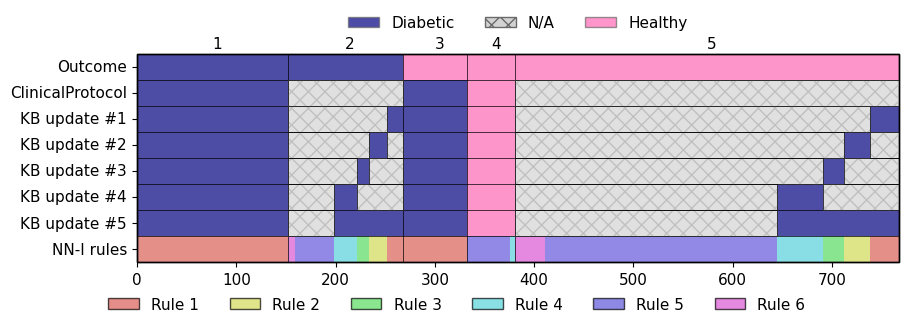

In [940]:
plt.rcParams['patch.edgecolor'] = 'none'
n = len(res_df.columns)-1
nr = 6
fig, axes = plt.subplots(figsize=(9, 3.4))

cmap = LinearSegmentedColormap.from_list('rg', [ "lightgray", healthy_col, diabetes_col] + list(sns.color_palette("hls", nr)), N=256) 
sns.heatmap(res_df.drop(columns = "EQ").T, cmap=cmap, cbar=False, alpha=0.7, xticklabels = 100,
            linewidths=0.0, ax=axes, rasterized=True)
#axes.set_yticklabels(['Outcome', 'Clinical Protocol', 'GB-CART', 'GB-CART + KB', 'DT', 'DT + KB'])
axes.tick_params(axis='both', which='major', labelsize=11)
colors = axes.collections[0].get_facecolors()
axes.collections[0].set_edgecolors(colors)

for r in range(1,len(res_df.columns)-1):
    axes.add_patch(Rectangle((0, 0),  len(res_df), r, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((0, 0), len(res_df), 8, fill=False, edgecolor="black", lw=1, clip_on=False))

n1 = len(res_df[(res_df["Outcome"]==1) & (res_df["ClinicalProtocol"]==1)])
n2 = len(res_df[(res_df["Outcome"]==1)])
n3 = len(res_df[(res_df["Outcome"]==1)]) + len(res_df[(res_df["Outcome"]==0) & (res_df["ClinicalProtocol"]==1)])
n4 = len(res_df) - len(res_df[(res_df["Outcome"]==0) & (res_df["ClinicalProtocol"]==-1)])
n5 = len(res_df)

axes.add_patch(Rectangle((0, 0), n1, 8, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((0, 0), n2, 8, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((0, 0), n3, 8, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((0, 0), n4, 8, fill=False, edgecolor="black", lw=0.5, clip_on=False))

axes.add_patch(Rectangle((n1, 1), n2-n1, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n1, 1), n2-n1, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((n4, 1), n5-n4, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n4, 1), n5-n4, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))

w11=len(res_df[(res_df["Outcome"]==1)&(res_df["ClinicalProtocol"]==-1)&(res_df["KB update #1"]==1)])
w12=len(res_df[(res_df["Outcome"]==0)&(res_df["ClinicalProtocol"]==-1)&(res_df["KB update #1"]==1)])
w21=len(res_df[(res_df["Outcome"]==1)&(res_df["ClinicalProtocol"]==-1)&(res_df["KB update #2"]==1)])
w22=len(res_df[(res_df["Outcome"]==0)&(res_df["ClinicalProtocol"]==-1)&(res_df["KB update #2"]==1)])
w31=len(res_df[(res_df["Outcome"]==1)&(res_df["ClinicalProtocol"]==-1)&(res_df["KB update #3"]==1)])
w32=len(res_df[(res_df["Outcome"]==0)&(res_df["ClinicalProtocol"]==-1)&(res_df["KB update #3"]==1)])
w41=len(res_df[(res_df["Outcome"]==1)&(res_df["ClinicalProtocol"]==-1)&(res_df["KB update #4"]==1)])
w42=len(res_df[(res_df["Outcome"]==0)&(res_df["ClinicalProtocol"]==-1)&(res_df["KB update #4"]==1)])

axes.add_patch(Rectangle((n1, 2), n2-n1-w11, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n1, 3), n2-n1-w11-w21, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n1, 4), n2-n1-w11-w21-w31, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n1, 5), n2-n1-w11-w21-w31-w41, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n1, 6), n2-n1-w11-w21-w31-w41, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n1, 2), n2-n1-w11, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((n1, 3), n2-n1-w11-w21, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((n1, 4), n2-n1-w11-w21-w31, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((n1, 5), n2-n1-w11-w21-w31-w41, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((n1, 6), n2-n1-w11-w21-w31-w41, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))

axes.add_patch(Rectangle((n2-w11, 3), w11, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n2-w11-w21, 4), w11+w21, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n2-w11-w21-w31, 5), w11+w21+w31, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n2-w11, 3), w11, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((n2-w11-w21, 4), w11+w21, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((n2-w11-w21-w31, 5), w11+w21+w31, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))




axes.add_patch(Rectangle((n4, 2), n5-n4-w12, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n4, 3), n5-n4-w12-w22, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n4, 4), n5-n4-w12-w22-w32, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n4, 5), n5-n4-w12-w22-w32-w42, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n4, 6), n5-n4-w12-w22-w32-w42, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n4, 2), n5-n4-w12, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((n4, 3), n5-n4-w12-w22, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((n4, 4), n5-n4-w12-w22-w32, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((n4, 5), n5-n4-w12-w22-w32-w42, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((n4, 6), n5-n4-w12-w22-w32-w42, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))

axes.add_patch(Rectangle((n5-w12, 3), w12, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n5-w12-w22, 4), w12+w22, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n5-w12-w22-w32, 5), w12+w22+w32, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((n5-w12, 3), w12, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((n5-w12-w22, 4), w12+w22, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))
axes.add_patch(Rectangle((n5-w12-w22-w32, 5), w12+w22+w32, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))

#axes.add_patch(Rectangle((n1, 2), n2-n1-w11-w21, 1, fill=False, edgecolor="black", lw=0.5, clip_on=False))
#axes.add_patch(Rectangle((n1, 3), n2, 1, fill=False, edgecolor="silver", lw=0.5, clip_on=False, hatch = "xx"))
axes.add_patch(Rectangle((0, 0), n5, 8, fill=False, edgecolor="black", lw=1, clip_on=False))

plt.text(n1/2,     -0.2, "1", size=11)
plt.text((n1+n2)/2,-0.2, "2", size=11)
plt.text((n2+n3)/2,-0.2, "3", size=11)
plt.text((n3+n4)/2,-0.2, "4", size=11)
plt.text((n4+n5)/2,-0.2, "5", size=11)
#plt.text(n+1,19, "here", size=11)

rule_legend_elements = [
    Patch(facecolor=color, edgecolor="black", label=f"Rule {i+1}", alpha = 0.7)
    for i, color in enumerate(sns.color_palette("hls", nr))
]

rule_legend = axes.legend(handles=rule_legend_elements, loc="upper center", bbox_to_anchor=(0.42, -0.1), ncol=8, fontsize=11)
rule_legend.get_frame().set_linewidth(0.0)
rule_legend.get_frame().set_facecolor('none')
rule_legend.get_frame().set_edgecolor('none')

# Add the second legend to the plot
axes.add_artist(rule_legend)

legend_elements = [
    Patch(facecolor=diabetes_col, edgecolor="dimgray", label="Diabetic", alpha= 0.7),
    Patch(facecolor="lightgray", edgecolor="dimgray", label="N/A", hatch="xx"),
    Patch(facecolor=healthy_col, edgecolor="dimgray", label="Healthy", alpha= 0.7)
]

legend = axes.legend(handles=legend_elements, loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=3, fontsize=11)
legend.get_frame().set_linewidth(0.0)
legend.get_frame().set_facecolor('none')
legend.get_frame().set_edgecolor('none')

plt.tight_layout(pad=0.4)
fig.subplots_adjust(bottom=0.2)
#plt.savefig(f"ml_{exp}_hatch.pdf")